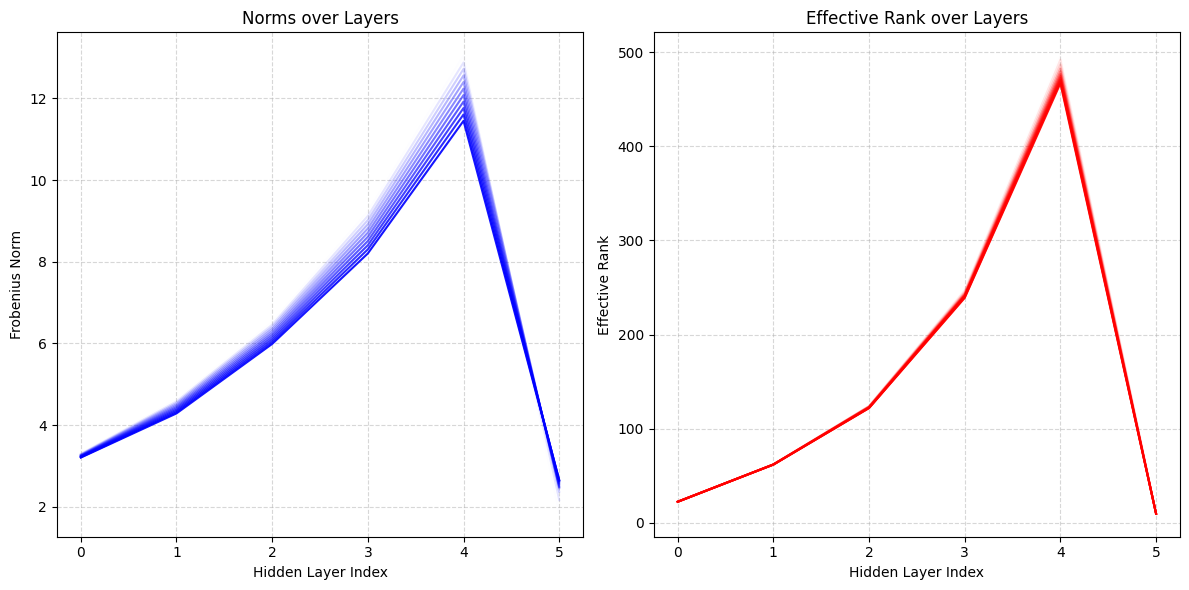

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
csv_path = os.path.join("csv_files", "layer_stats.csv")
df = pd.read_csv(csv_path)

# Identify how many layers we have based on the columns:
# We have 1 'step' column + pairs of norm_i and rank_i columns.
columns = df.columns.tolist()
# Remove 'step' from the count:
columns.remove('step')
num_layers = len(columns) // 2  # because each layer contributes a norm and a rank

# Extract just the norms and ranks for convenience
norm_cols = [f"norm_{i}" for i in range(num_layers)]
rank_cols = [f"rank_{i}" for i in range(num_layers)]

# Get the number of steps (rows)
num_steps = len(df)

# Create a figure with two subplots: one for norms and one for ranks
fig, (ax_norm, ax_rank) = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# We'll plot a line for each training step.
# Earlier steps have lower alpha, later steps have higher alpha.
# For example, alpha = (index_of_step + 1) / num_steps
# so the first row (earliest step) is alpha ~ 1/num_steps (low), and last step is alpha=1
x = np.arange(num_layers)  # x-axis is the layer indices
for i in range(0,num_steps,10):
    # Get norms and ranks for this step
    norms = df.loc[i, norm_cols].values
    ranks = df.loc[i, rank_cols].values

    alpha = (i + 1) / num_steps  # scale alpha from low at start to high at end

    # Plot norms
    ax_norm.plot(x, norms, color='blue', alpha=alpha)
    # Plot ranks
    ax_rank.plot(x, ranks, color='red', alpha=alpha)

# Set labels and titles
ax_norm.set_title("Norms over Layers")
ax_norm.set_xlabel("Hidden Layer Index")
ax_norm.set_ylabel("Frobenius Norm")

ax_rank.set_title("Effective Rank over Layers")
ax_rank.set_xlabel("Hidden Layer Index")
ax_rank.set_ylabel("Effective Rank")

# Optional: Add grid and adjust layout
ax_norm.grid(True, linestyle='--', alpha=0.5)
ax_rank.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()
